<a href="https://colab.research.google.com/github/jackson119/new_cifar_10/blob/main/new__cifar10_3(0.15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [7]:
from tensorflow.keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [8]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [9]:
print("train data:","images:",x_img_train.shape,"labels:",y_label_train.shape)
print("test data:","images:",x_img_test.shape,"labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


# standardize and perform one hot encoding

In [10]:
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

In [11]:
from tensorflow.keras import utils

In [12]:
y_label_train_OneHot=utils.to_categorical(y_label_train)
y_label_test_OneHot=utils.to_categorical(y_label_test)

# Images and label

In [13]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [14]:
# Construct model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
### neural network
model.add(Flatten())
model.add(Dropout(0.15))
### hidden layer 1
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.15))
### hidden layer 2
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.15))
### output layer
model.add(Dense(10,activation='softmax'))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=50,batch_size=300,verbose=2)

Epoch 1/50
134/134 - 39s - loss: 1.8549 - accuracy: 0.3021 - val_loss: 1.7361 - val_accuracy: 0.3763
Epoch 2/50
134/134 - 4s - loss: 1.3991 - accuracy: 0.4842 - val_loss: 1.2772 - val_accuracy: 0.5410
Epoch 3/50
134/134 - 5s - loss: 1.1670 - accuracy: 0.5771 - val_loss: 1.0699 - val_accuracy: 0.6202
Epoch 4/50
134/134 - 5s - loss: 0.9846 - accuracy: 0.6474 - val_loss: 0.9692 - val_accuracy: 0.6536
Epoch 5/50
134/134 - 5s - loss: 0.8488 - accuracy: 0.6995 - val_loss: 0.8186 - val_accuracy: 0.7127
Epoch 6/50
134/134 - 5s - loss: 0.7585 - accuracy: 0.7293 - val_loss: 0.8666 - val_accuracy: 0.6988
Epoch 7/50
134/134 - 5s - loss: 0.6773 - accuracy: 0.7603 - val_loss: 0.7616 - val_accuracy: 0.7378
Epoch 8/50
134/134 - 5s - loss: 0.5938 - accuracy: 0.7886 - val_loss: 0.7134 - val_accuracy: 0.7559
Epoch 9/50
134/134 - 5s - loss: 0.5176 - accuracy: 0.8159 - val_loss: 0.7098 - val_accuracy: 0.7568
Epoch 10/50
134/134 - 5s - loss: 0.4643 - accuracy: 0.8360 - val_loss: 0.7214 - val_accuracy: 0.756

In [22]:
from matplotlib import pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('train')
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

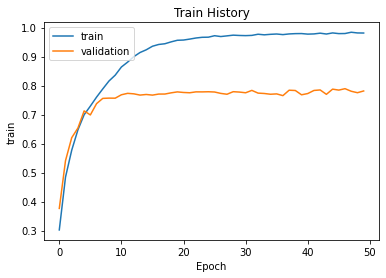

In [23]:
show_train_history(train_history,'accuracy','val_accuracy')

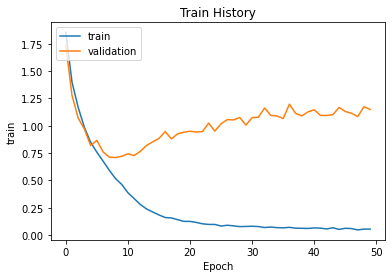

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
### estimate model accuracy

In [26]:
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)

In [27]:
print(f'Test loss: {scores[0]} / Test accuracy: {scores[1]}')

Test loss: 1.2573974132537842 / Test accuracy: 0.7699999809265137


In [28]:
prediction=model.predict_classes(x_img_test_normalize) ### prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
prediction

array([3, 8, 8, ..., 5, 1, 7])

In [30]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25:num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(images[idx],cmap='binary')
    title=str(i) +',' +label_dict[labels[i][0]]
    if len(prediction)>0:
      title+='=>'+label_dict[prediction[i]]
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

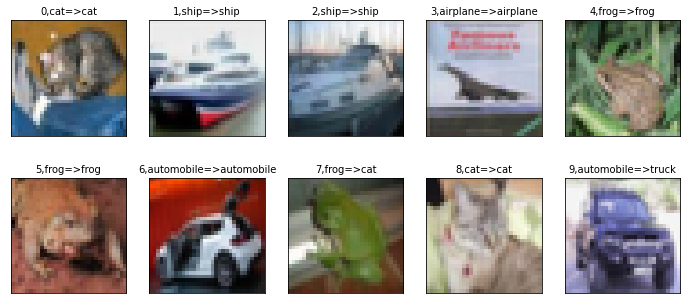

In [31]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [32]:
# check for prediction rate
predicted_Probability=model.predict(x_img_test_normalize)

In [33]:
def show_predicted_probability(y,prediction,x_img,predicted_Probability,i):
  print('label:',label_dict[y[i][0]],
        'predict',label_dict[prediction[i]])
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
  plt.show()
  for j in range(10):
    print(label_dict[j]+ ' probability:%1.9f'%(predicted_Probability[i][j]))


label: cat predict cat


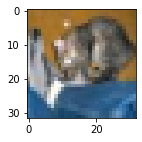

airplane probability:0.000024878
automobile probability:0.000000726
bird probability:0.000007809
cat probability:0.767914534
deer probability:0.000000000
dog probability:0.231985003
frog probability:0.000000328
horse probability:0.000000050
ship probability:0.000066492
truck probability:0.000000116


In [34]:
show_predicted_probability(y_label_test,prediction,x_img_test,predicted_Probability,0)

#Confusion matrix

In [35]:
import pandas as pd

In [36]:
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,775,16,59,13,11,2,6,14,62,42
1,11,878,6,5,1,3,3,5,18,70
2,54,4,710,47,58,49,39,24,7,8
3,17,3,78,536,55,164,46,61,10,30
4,17,3,69,57,712,31,23,79,4,5
5,5,6,47,140,22,689,21,60,4,6
6,11,4,44,50,45,27,787,13,11,8
7,9,1,19,26,32,40,3,841,3,26
8,37,17,10,9,3,4,5,5,880,30
